In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

Dataset utilizado para campañas de marketing. Tenemos la idea es buscar patrones de los usuarios basado en los consumos y características

In [ ]:
path='/content/drive/MyDrive/1 - Carpeta/4 - IA/Colab de IA/Pruebas - Propias/marketing_campaign.csv'
df=pd.read_csv(path,sep="\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


#Curación de Datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Al dataset hay que curarlo por algunos valores NaN y modificar algunas variables.

In [ ]:
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [ ]:
df.head()
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [ ]:
df['Year_Birth']= 2022 - df['Year_Birth'] #Cambiar año de nacimiento por edad

<ipython-input-6-ce3d21fe2433>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year_Birth']= 2022 - df['Year_Birth'] #Cambiar año de nacimiento por edad


In [ ]:
df=df.rename(columns={'Year_Birth': 'Age'})
df=df.rename(columns={'MntWines':'Wine',                
'MntFruit':'Fruit',                 
'MntMeatProducts':'Meat',           
'MntFishProducts':'Fish',           
'MntSweetProducts':'Sweet',          
'MntGoldProds':'Gold'})

In [ ]:
df['Dt_Customer']=pd.to_datetime(df["Dt_Customer"]) #Fecha desde que es cliente.

<ipython-input-8-6a454d2ba51f>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer']=pd.to_datetime(df["Dt_Customer"]) #Fecha desde que es cliente.


In [ ]:
ref_date = pd.to_datetime('23-04-2023')
df['days_since_ref'] = (ref_date - df['Dt_Customer']).dt.days

<ipython-input-9-930331d6d791>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  ref_date = pd.to_datetime('23-04-2023')


In [ ]:
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "ID","Complain","Response"]
data = df.drop(to_drop, axis=1)

In [ ]:
df['Education'].unique()
data['Education'] = data['Education'].replace({'Basic': 0,'2n Cycle': 0,'Graduation':1,'Master':2,'PhD':3})

In [ ]:
data.head()

,Age,Education,Income,Kidhome,Teenhome,Recency,Wine,MntFruits,Meat,Fish,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,days_since_ref
0,65,1,58138.0,0,0,58,635,88,546,172,...,8,10,4,7,0,0,0,0,0,4031
1,68,1,46344.0,1,1,38,11,1,6,2,...,1,1,2,5,0,0,0,0,0,3185
2,57,1,71613.0,0,0,26,426,49,127,111,...,8,2,10,4,0,0,0,0,0,3532
3,38,1,26646.0,1,0,26,11,4,20,10,...,2,0,4,6,0,0,0,0,0,3125
4,41,3,58293.0,1,0,94,173,43,118,46,...,5,3,6,5,0,0,0,0,0,3381


#Clustering con KMean

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

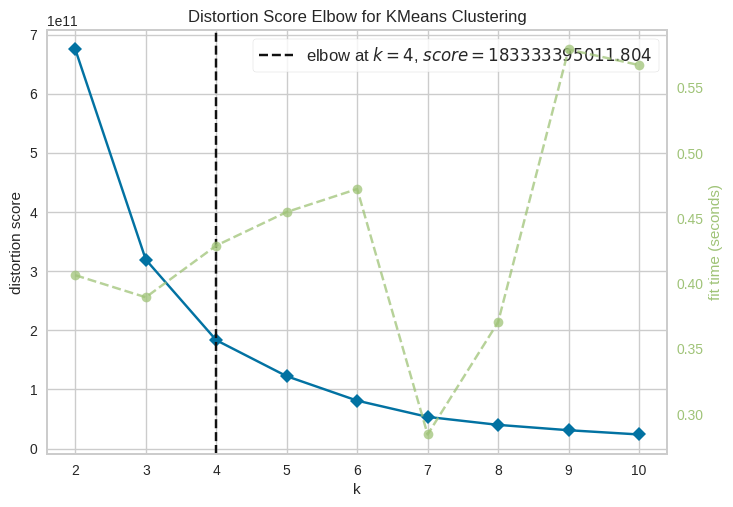

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
Elbow_M = KElbowVisualizer(KMeans(), k=10) #Libreria de visualización de la elbow
Elbow_M.fit(data)
Elbow_M.show()

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=32, n_init="auto").fit(data)

In [ ]:
# Obtener reglas de pertenencia a los grupos
for i in range(4):
    print('Grupo', i+1)
    print(data[kmeans.labels_== i].mean(),'\n')

Grupo 1
Age                       48.897712
Education                  1.282638
Income                 28380.375505
Kidhome                    0.808883
Teenhome                   0.313594
Recency                   48.589502
Wine                      30.604307
MntFruits                  5.985195
Meat                      25.558546
Fish                       9.060565
Sweet                      6.040377
Gold                      17.740242
NumDealsPurchases          2.141319
NumWebPurchases            2.158816
NumCatalogPurchases        0.527591
NumStorePurchases          3.082100
NumWebVisitsMonth          6.908479
AcceptedCmp3               0.084791
AcceptedCmp4               0.004038
AcceptedCmp5               0.000000
AcceptedCmp1               0.001346
AcceptedCmp2               0.000000
days_since_ref          3574.767160
dtype: float64 

Grupo 2
Age                       54.566230
Education                  1.556041
Income                 76967.844250
Kidhome                    0.08

Según el método de K-Means, podemos tener la siguiente información: 

- La edad es bastante homogenea entre los 4 grupos (45 a 56)
- Agrupa por el ingreso medio de las personas (desviación importante de Income en cada grupo)
- Cuanto mayor es el número de hijos, mayor es el ingreso (analizando 2 variables)
- Hay grupos que al aumenta el consumo de todos los productos (relacionado con el ingreso), excepto el grupo 4 con el mayor ingreso pero menos consume.
- Hay agrupaciones por nivel de educación: los que tienen estudios completos con master o posgrados) 

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Calcular métricas de performance
inertia = kmeans.inertia_ 

silhouette = silhouette_score(data, kmeans.labels_) # estudiar la distancia de 
#separación entre los clusters resultantes.

calinski_harabasz = calinski_harabasz_score(data, kmeans.labels_) 
#El índice CH (también conocido como criterio de relación de varianza ) es una 
#medida de cuán similar es un objeto a su propio grupo (cohesión) en comparación
#con otros grupos (separación)

davies_bouldin = davies_bouldin_score(data, kmeans.labels_) #Valores pequeños para el índice DB indica clústeres compactos, y
#cuyos centros estas bien separados los unos de los otros.
#Consecuentemente el número de clústeres que minimiza el índice DB
#se toma como el óptimo

# Imprimir métricas de performance
print('Inertia:', inertia)
print('Silhouette score:', silhouette)
print('Calinski-Harabasz index:', calinski_harabasz)
print('Davies-Bouldin index:', davies_bouldin)

Inertia: 183333395011.80344
Silhouette score: 0.5405153155941897
Calinski-Harabasz index: 4909.759401156712
Davies-Bouldin index: 0.4183301783371467


#Clustering con HAC

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
AC = AgglomerativeClustering(n_clusters=4)

hac=AC.fit(data)

In [ ]:
hac.labels_

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
for i in range(4):
    print('Grupo', i+1)
    print(data[hac.labels_== i].mean(),'\n')

Grupo 1
Age                       55.271335
Education                  1.559081
Income                 73050.044858
Kidhome                    0.112691
Teenhome                   0.477024
Recency                   49.114880
Wine                     578.004376
MntFruits                 51.936543
Meat                     341.960613
Fish                      73.103939
Sweet                     53.087527
Gold                      68.642232
NumDealsPurchases          1.983589
NumWebPurchases            5.532823
NumCatalogPurchases        4.935449
NumStorePurchases          8.297593
NumWebVisitsMonth          3.625821
AcceptedCmp3               0.061269
AcceptedCmp4               0.131291
AcceptedCmp5               0.176149
AcceptedCmp1               0.147702
AcceptedCmp2               0.021882
days_since_ref          3568.016411
dtype: float64 

Grupo 2
Age                       54.491228
Education                  1.628880
Income                 46126.066127
Kidhome                    0.58

Representación de Dendograma al Clustering

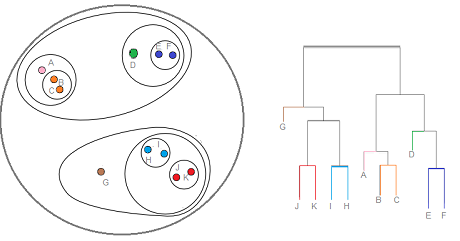

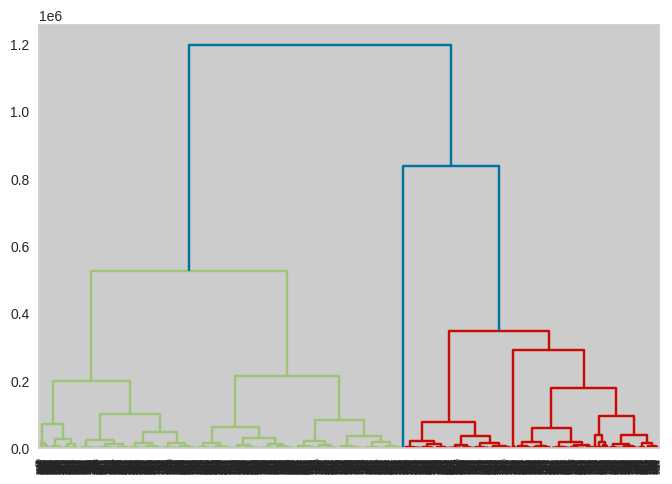

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Crear matriz de distancia
dist_mat = linkage(data, method='ward')

# Crear dendrograma
dendrogram(dist_mat)
#, truncate_mode='level', p=5)
# Mostrar dendrograma
plt.show()

Forma de visualización de HAC es a través del dendograma (cada nodo representa un cluster de mayor jerarquía que los de las raices). Se puede truncar con: 
```
, truncate_mode='level', p=5)
```
Va a mostrar hasta 5 niveles de principales de jerarquia. 

#Ética

Se debe tener en cuenta que son algorítmos no supervisados, es decir que no tenemos ingerencia en cual va a ser la salida del mismo (aunque sabemos que es un agrupamiento). El riesgo a una salida sesgada es peligroso en determinado contexto como el de seguridad, exposición de identidad, etc.

Tomando los principio de éticos de la UNESCO recalcamos: 
- Respeto, protección y promoción de derechos humanos independiendemente de las características de los sujetos. Esto es fundamental en agrupamiento como HAC o K-Means donde formara grupos teniendo en cuenta diferentes características sin tener en cuenta la esencia humana.

- Diversidad: promover participación de diferentes actores de la sociedad y respetar la diversidad cultural. En este caso, tener una base amplia de datos para agrupar y no sesgada.

- No discriminación: referido a que si ciertos sujetos se los agrupa en un Cluster X, no sean marginados por los otros.

- Transparencia y Explicabilidad: esta es una parte fundamental dentro de segmento de ética en Clustering. Al ser modelos no supervisador, no vemos cuales pueden ser las diferentes salidas del programa. Sin embargo, puede ser explicativo (a través de kmeans.labels_) por medio de etiquetas y cuales fueron los factores que intervinieron para el calculo de la Inertia. 